In [1]:
import pandas as pd

In [2]:
notes_df = pd.read_csv('NOTEEVENTS.csv.gz',compression='gzip')

/var/folders/l5/6m6m7kg944x8c14blll3_md40000gn/T/ipykernel_1527/2234219202.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df = pd.read_csv('NOTEEVENTS.csv.gz',compression='gzip')


In [3]:
notes_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [4]:
notes_df.size

22914980

In [5]:
notes_df['CATEGORY'].unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [6]:
df = notes_df.sample(n=5000)

In [7]:
text = df.loc[:, "TEXT"]

In [8]:
text.head()

338368     Tracheal reconstruction (Tracheobronchial)\n  ...
1433033    Pt. alert and pleasant. Slept for the earlier ...
1071145    [**Last Name (LF) 477**],[**First Name3 (LF) 4...
824363     [**2156-7-19**] 8:17 PM\n CHEST (PA & LAT)    ...
1270533    CCU admit note!\n64yo spanish speaking female ...
Name: TEXT, dtype: object

In [9]:
patients = pd.read_csv("PATIENTS.csv")

In [10]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


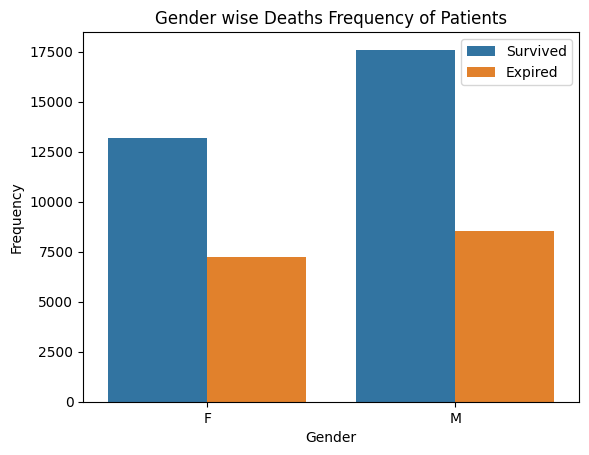

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plot
ax = sns.countplot(x='GENDER', data=patients,hue="EXPIRE_FLAG")

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Gender wise Deaths Frequency of Patients')
ax.legend(labels=['Survived', 'Expired'])

# Add legend
#ax.legend(labels=['Survived', 'Expired'])

# Show plot
plt.show()


In [12]:
df2=pd.read_csv("ADMISSIONS.csv")

In [13]:
df2.head()


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [14]:
merged_df = pd.merge(notes_df, df2, on='SUBJECT_ID', how='inner')

print(merged_df)

         ROW_ID_x  SUBJECT_ID  HADM_ID_x   CHARTDATE            CHARTTIME  \
0             174       22532   167853.0  2151-08-04                  NaN   
1             170       22532   167853.0  2151-08-04                  NaN   
2           59795       22532   167853.0  2151-08-02                  NaN   
3           59796       22532   167853.0  2151-07-19                  NaN   
4          106289       22532   167853.0  2151-08-03                  NaN   
...           ...         ...        ...         ...                  ...   
3952125   2077236       31790   132855.0  2164-09-15  2164-09-15 03:37:00   
3952126   2079379       32151   115098.0  2199-09-22  2199-09-22 21:15:00   
3952127   2079380       32151   115098.0  2199-09-22  2199-09-22 21:22:00   
3952128   2075452       31655   175166.0  2148-07-25  2148-07-25 21:51:00   
3952129   2075453       31655   175166.0  2148-07-25  2148-07-25 22:24:00   

                   STORETIME           CATEGORY DESCRIPTION     CGID  ISERR

In [15]:
merged_df.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID_x,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,...,Medicare,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2151-07-16 04:49:00,2151-07-16 14:20:00,RT LOWER LOBE PNEUMONIA,0,1
1,170,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,...,Medicare,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2151-07-16 04:49:00,2151-07-16 14:20:00,RT LOWER LOBE PNEUMONIA,0,1
2,59795,22532,167853.0,2151-08-02,NaN,NaN,Echo,Report,NaN,NaN,...,Medicare,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2151-07-16 04:49:00,2151-07-16 14:20:00,RT LOWER LOBE PNEUMONIA,0,1
3,59796,22532,167853.0,2151-07-19,NaN,NaN,Echo,Report,NaN,NaN,...,Medicare,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2151-07-16 04:49:00,2151-07-16 14:20:00,RT LOWER LOBE PNEUMONIA,0,1
4,106289,22532,167853.0,2151-08-03,NaN,NaN,ECG,Report,NaN,NaN,...,Medicare,NaN,UNOBTAINABLE,UNKNOWN (DEFAULT),UNKNOWN/NOT SPECIFIED,2151-07-16 04:49:00,2151-07-16 14:20:00,RT LOWER LOBE PNEUMONIA,0,1


In [16]:
merged_df[['TEXT','DIAGNOSIS']]

,TEXT,DIAGNOSIS
0,Admission Date: [**2151-7-16**] Dischar...,RT LOWER LOBE PNEUMONIA
1,Admission Date: [**2151-7-16**] Dischar...,RT LOWER LOBE PNEUMONIA
2,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,RT LOWER LOBE PNEUMONIA
3,PATIENT/TEST INFORMATION:\nIndication: Endocar...,RT LOWER LOBE PNEUMONIA
4,Atrial fibrillation with a slow ventricular re...,RT LOWER LOBE PNEUMONIA
...,...,...
3952125,Neonatology Attending Triage Note\n\nAsked by ...,NEWBORN
3952126,Neonatology Attending Triage Note\nAsked to ev...,NEWBORN
3952127,Admission Note\n\n\nBaby [**Known lastname 782...,NEWBORN
3952128,Neonatology\nBaby Girl [**Known lastname 1672*...,NEWBORN


In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import re




In [18]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varunkabra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunkabra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/varunkabra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
# Load dataset
# Assuming 'data.csv' is the name of your dataset file
df = merged_df[['TEXT','DIAGNOSIS']].head(4000)
df



,TEXT,DIAGNOSIS
0,Admission Date: [**2151-7-16**] Dischar...,RT LOWER LOBE PNEUMONIA
1,Admission Date: [**2151-7-16**] Dischar...,RT LOWER LOBE PNEUMONIA
2,PATIENT/TEST INFORMATION:\nIndication: Aortic ...,RT LOWER LOBE PNEUMONIA
3,PATIENT/TEST INFORMATION:\nIndication: Endocar...,RT LOWER LOBE PNEUMONIA
4,Atrial fibrillation with a slow ventricular re...,RT LOWER LOBE PNEUMONIA
...,...,...
3995,CCU Nursing Progress Note\nS-Orally intubated ...,CONGESTIVE HEART FAILURE
3996,Respiratory Care: Pt weaned to cpap 5/ ps 8 40...,CORONARY ARTERY DISEASE
3997,Respiratory Care: Pt weaned to cpap 5/ ps 8 40...,ANEMIA;S/P MI
3998,Respiratory Care: Pt weaned to cpap 5/ ps 8 40...,CONGESTIVE HEART FAILURE


In [20]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text



def is_symptom(word):
    symptom_keywords = ['pain chest', 'shortness of breath', 'dizziness', 'asthenia',
       'fall', 'syncope', 'vertigo', 'sweat', 'sweating increased',
       'palpitation', 'nausea', 'angina pectoris', 'pressure chest',
       'polyuria', 'polydypsia', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       'green sputum', 'non-productive cough', 'wheezing', 'haemoptysis',
       'distress respiratory', 'tachypnea', 'malaise', 'night sweat',
       'jugular venous distention', 'dyspnea', 'dysarthria',
       'speech slurred', 'facial paresis', 'hemiplegia', 'seizure',
       'numbness', 'symptom aggravating factors', 'st segment elevation',
       'st segment depression', 't wave inverted', 'presence of q wave',
       'chest discomfort', 'bradycardia', 'pain', 'nonsmoker', 'erythema',
       'hepatosplenomegaly', 'pruritus', 'diarrhea', 'abscess bacterial',
       'swelling', 'apyrexial', 'dysuria', 'hematuria',
       'renal angle tenderness', 'lethargy', 'hyponatremia',
       'hemodynamically stable', 'difficulty passing urine',
       'consciousness clear', 'guaiac positive', 'monoclonal',
       'ecchymosis', 'tumor cell invasion', 'haemorrhage', 'pallor',
       'fatigue', 'heme positive', 'pain back', 'orthostasis',
       'arthralgia', 'transaminitis', 'sputum purulent', 'hypoxemia',
       'hypercapnia', 'patient non compliance', 'unconscious state',
       'bedridden', 'abdominal tenderness', 'unsteady gait',
       'hyperkalemia', 'urgency ofÃ\x82Â\xa0micturition', 'ascites',
       'hypotension', 'enuresis', 'asterixis', 'muscle twitch', 'sleepy',
       'headache', 'lightheadedness', 'food intolerance',
       'numbness of hand', 'general discomfort', 'drowsiness',
       'stiffness', 'prostatism', 'weight gain', 'tired',
       'mass of body structure', 'has religious belief', 'nervousness',
       'formication', 'hot flush', 'lesion', 'cushingoid facies',
       'cushingoidÃ\x82Â\xa0habitus', 'emphysematous change',
       'decreased body weight', 'hoarseness', 'thicken',
       'spontaneous rupture of membranes', 'muscle hypotonia',
       'hypotonic', 'redness', 'hypesthesia', 'hyperacusis',
       'scratch marks', 'sore to touch', 'burning sensation',
       'satiety early', 'throbbing sensation quality',
       'sensory discomfort', 'constipation', 'pain abdominal',
       'heartburn', 'breech presentation', 'cyanosis',
       'pain in lower limb', 'cardiomegaly', 'clonus', 'unwell',
       'anorexia', 'history of - blackout', 'anosmia',
       'metastatic lesion', 'hemianopsia homonymous',
       'hematocrit decreased', 'neck stiffness', 'cicatrisation',
       'hypometabolism', 'aura', 'myoclonus', 'gurgle',
       'wheelchair bound', 'leftÃ\x82Â\xa0atrialÃ\x82Â\xa0hypertrophy',
       'oliguria', 'catatonia', 'unhappy', 'paresthesia', 'gravida 0',
       'lung nodule', 'distended abdomen', 'ache', 'macerated skin',
       'heavy feeling', 'rest pain', 'sinus rhythm', 'withdraw',
       'behavior hyperactive', 'terrify', 'photopsia', 'giddy mood',
       'disturbed family', 'hypersomnia', 'hyperhidrosis disorder',
       'mydriasis', 'extrapyramidal sign', 'loose associations',
       'exhaustion', 'snore', 'r wave feature', 'overweight',
       'systolic murmur', 'asymptomatic', 'splenomegaly',
       'bleeding of vagina', 'macule', 'photophobia',
       'painful swallowing', 'cachexia', 'hypocalcemia result',
       'hypothermia, natural', 'atypia', 'general unsteadiness',
       'throat sore', 'snuffle', 'hacking cough', 'stridor', 'paresis',
       'aphagia', 'focal seizures', 'abnormal sensation', 'stupor',
       'fremitus', "Stahli's line", 'stinging sensation', 'paralyse',
       'hirsutism', 'sniffle', 'bradykinesia', 'out of breath',
       'urge incontinence', 'vision blurred', 'room spinning',
       'rambling speech', 'clumsiness', 'decreased stool caliber',
       'hematochezia', 'egophony', 'scar tissue', 'neologism',
       'decompensation', 'stool color yellow',
       'rigor - temperature-associated observation', 'paraparesis',
       'moody', 'fear of falling', 'spasm', 'hyperventilation',
       'excruciating pain', 'gag', 'posturing', 'pulse absent',
       'dysesthesia', 'polymyalgia', 'passed stones',
       'qt interval prolonged', 'ataxia', "Heberden's node",
       'hepatomegaly', 'sciatica', 'frothy sputum', 'mass in breast',
       'retropulsion', 'estrogen use', 'hypersomnolence', 'underweight',
       'dullness', 'red blotches', 'colic abdominal', 'hypokalemia',
       'hunger', 'prostate tender', 'pain foot', 'urinary hesitation',
       'disequilibrium', 'flushing', 'indifferent mood', 'urinoma',
       'hypoalbuminemia', 'pustule', 'slowing of urinary stream',
       'extreme exhaustion', 'no status change', 'breakthrough pain',
       'pansystolic murmur', 'systolic ejection murmur', 'stuffy nose',
       'barking cough', 'rapid shallow breathing', 'noisy respiration',
       'nasal discharge present', 'frail', 'cystic lesion',
       'projectile vomiting', 'heavy legs', 'titubation',
       'dysdiadochokinesia', 'achalasia', 'side pain', 'monocytosis',
       'posteriorÃ\x82Â\xa0rhinorrhea', 'incoherent', 'lameness',
       'claudication', 'clammy skin', 'mediastinal shift',
       'nausea and vomiting', 'awakening early', 'tenesmus', 'fecaluria',
       'pneumatouria', 'todd paralysis', 'alcoholic withdrawal symptoms',
       'myalgia', 'dyspareunia', 'poor dentition', 'floppy',
       'inappropriate affect', 'poor feeding', 'moan', 'welt', 'tinnitus',
       'hydropneumothorax', 'superimposition', 'feeling strange',
       'uncoordination', 'absences finding', 'tonic seizures',
       'debilitation', 'impaired cognition', 'drool', 'pin-point pupils',
       'tremor resting', 'groggy', 'adverse reaction', 'adverse effect',
       'abdominal bloating', 'fatigability', 'para 2', 'abortion',
       'intermenstrual heavy bleeding', 'previous pregnancies 2',
       'primigravida', 'abnormally hard consistency', 'proteinemia',
       'pain neck', 'dizzy spells', 'shooting pain', 'hyperemesis',
       'milky', 'regurgitates after swallowing', 'lip smacking',
       'phonophobia', 'rolling of eyes', 'ambidexterity',
       'pulsusÃ\x82Â\xa0paradoxus', 'gravida 10', 'bruit',
       'breath-holding spell', 'scleralÃ\x82Â\xa0icterus', 'retch',
       'blanch', 'elation', 'verbally abusive behavior', 'transsexual',
       'behavior showing increased motor activity',
       'coordination abnormal', 'choke', 'bowel sounds decreased',
       'no known drug allergies', 'low back pain', 'charleyhorse',
       'sedentary', 'feels hot/feverish', 'flare',
       'pericardial friction rub', 'hoard', 'panic',
       'cardiovascular finding', 'cardiovascular event',
       'soft tissue swelling', 'rhd positive', 'para 1', 'nasal flaring',
       'sneeze', 'hypertonicity', "Murphy's sign", 'flatulence',
       'gasping for breath', 'feces in rectum', 'prodrome',
       'hypoproteinemia', 'alcohol binge episode', 'abdomen acute',
       'air fluid level', 'catching breath', 'large-for-dates fetus',
       'immobile', 'homicidal thoughts']
    return word in symptom_keywords

def extract_symptoms(text):
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    symptoms = [word for word, pos in tagged_words if (pos == 'NN' or pos == 'JJ') and is_symptom(word)]
    return symptoms

def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

In [21]:
df['TEXT'] = df['TEXT'].apply(preprocess_text)
df['Keywords'] = df['TEXT'].apply(extract_symptoms)
df['Keywords'] = df['Keywords'].apply(remove_stopwords)

In [22]:
df['Keywords'].to_csv('initialbuild.csv')